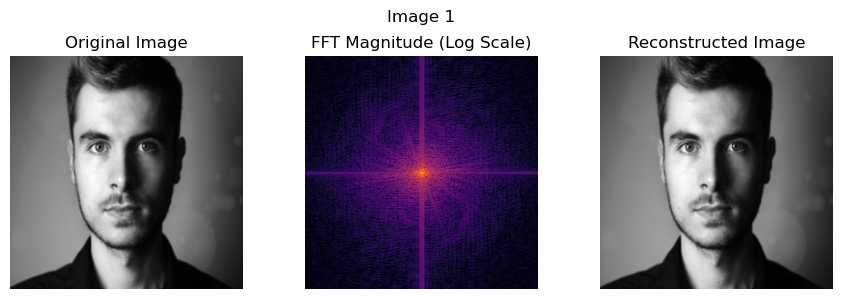

In [9]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from scipy.fft import fftshift
import numpy as np

# 🔹 1. Load Images (Replace paths if needed)
image_paths = [
    'data\pexels-photo-614810.jpeg'
]

# 🔹 2. Resize and convert to tensor
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Process each image
for idx, path in enumerate(image_paths):
    try:
        # Load and convert to grayscale
        img = Image.open(path).convert("L")
        img_tensor = transform(img).unsqueeze(0)  # Shape: (1, 1, H, W)

        # 🔹 3. Apply FFT
        fft_image = torch.fft.fft2(img_tensor)
        fft_image_np = fft_image.squeeze().numpy()
        fft_shifted = fftshift(fft_image_np)
        magnitude_spectrum = np.log1p(np.abs(fft_shifted))

        # 🔹 4. Apply IFFT (reconstruction)
        reconstructed = torch.fft.ifft2(fft_image).real.squeeze().numpy()

        # 🔹 5. Visualization
        fig, axs = plt.subplots(1, 3, figsize=(9, 3))
        axs[0].imshow(img_tensor.squeeze().numpy(), cmap='gray')
        axs[0].set_title("Original Image")

        axs[1].imshow(magnitude_spectrum, cmap='inferno')
        axs[1].set_title("FFT Magnitude (Log Scale)")

        axs[2].imshow(reconstructed, cmap='gray')
        axs[2].set_title("Reconstructed Image")

        for ax in axs:
            ax.axis('off')

        plt.suptitle(f"Image {idx + 1}")
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Failed to process image at path: {path}\nError: {e}")


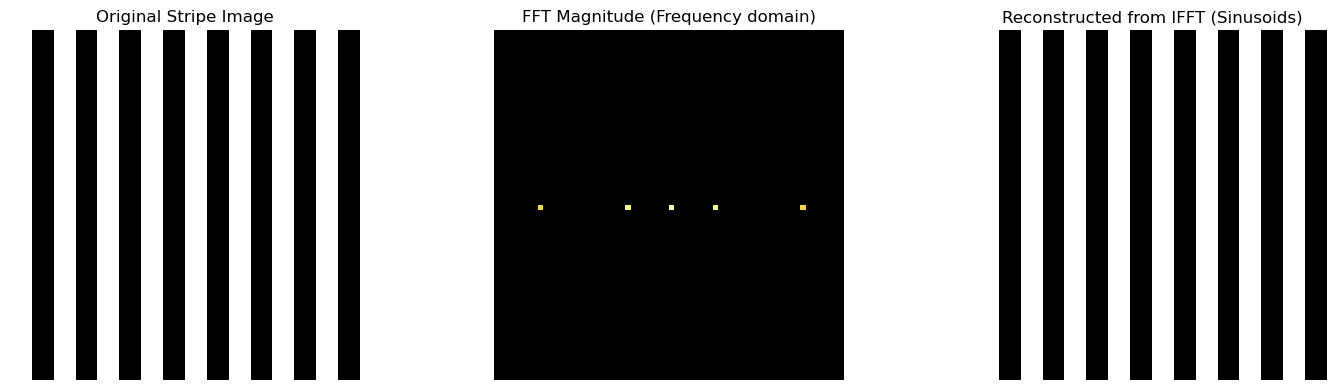

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift

# Generate simple image: vertical stripes
def generate_stripes_image(size, stripe_width):
    img = np.zeros((size, size))
    for i in range(0, size, stripe_width * 2):
        img[:, i:i + stripe_width] = 255
    return img

# 1. Create image
img_size = 64
img = generate_stripes_image(img_size, stripe_width=4)

# 2. Apply FFT
fft_result = fft2(img)
fft_shifted = fftshift(fft_result)  # Shift for center alignment
magnitude_spectrum = np.log1p(np.abs(fft_shifted))  # Log scale

# 3. Inverse FFT to see sinusoidal reconstruction
reconstructed = np.real(ifft2(fft_result))

# 4. Plot everything
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original Stripe Image")

axs[1].imshow(magnitude_spectrum, cmap='inferno')
axs[1].set_title("FFT Magnitude (Frequency domain)")

axs[2].imshow(reconstructed, cmap='gray')
axs[2].set_title("Reconstructed from IFFT (Sinusoids)")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()
